# Cervical Cancer Risk Factors
- Sara Echeverría 21371
- Melissa Pérez 21385

Repositorio de github: https://github.com/bl33h/cervicalCancerRiskFactors

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro, chi2_contingency
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import statsmodels.api as sm
from statsmodels.formula.api import ols
from IPython.display import display

### Exploratory Analysis

In [18]:
df = pd.read_csv('data/risk_factors_cervical_cancer.csv', encoding='latin1')
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [19]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
dataTypes = df.dtypes
print(dataTypes)

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [21]:
df.replace('?', np.nan, inplace=True)

# Sexual partners to int
df['Number of sexual partners'] = pd.to_numeric(df['Number of sexual partners'], errors='coerce')
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(0)
df['Number of sexual partners'] = df['Number of sexual partners'].astype(int)

# Convert numerical columns to float
numerical_cols = ['Age', 'Number of sexual partners', 'First sexual intercourse', 
                  'Num of pregnancies', 'Smokes', 'Smokes (years)', 
                  'Smokes (packs/year)', 'Hormonal Contraceptives', 
                  'Hormonal Contraceptives (years)', 'IUD', 
                  'IUD (years)', 'STDs', 'STDs (number)', 
                  'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 
                  'STDs: Time since last diagnosis']

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the cleaned dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    int32  
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [22]:
numerical_summary = df.describe()

# Summary statistics for categorical variables
categorical_cols = ['Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 
                    'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
categorical_summary = df[categorical_cols].describe()

# Mostrar los DataFrames
print("Numerical Summary Statistics")
print(numerical_summary)

print("\nCategorical Summary Statistics")
print(categorical_summary)

Numerical Summary Statistics
              Age  Number of sexual partners  First sexual intercourse  \
count  858.000000                 858.000000                851.000000   
mean    26.820513                   2.451049                 16.995300   
std      8.497948                   1.698528                  2.803355   
min     13.000000                   0.000000                 10.000000   
25%     20.000000                   1.000000                 15.000000   
50%     25.000000                   2.000000                 17.000000   
75%     32.000000                   3.000000                 18.000000   
max     84.000000                  28.000000                 32.000000   

       Num of pregnancies      Smokes  Smokes (years)  Smokes (packs/year)  \
count          802.000000  845.000000      845.000000           845.000000   
mean             2.275561    0.145562        1.219721             0.453144   
std              1.447414    0.352876        4.089017             2.22

#### Exploratory Graphs

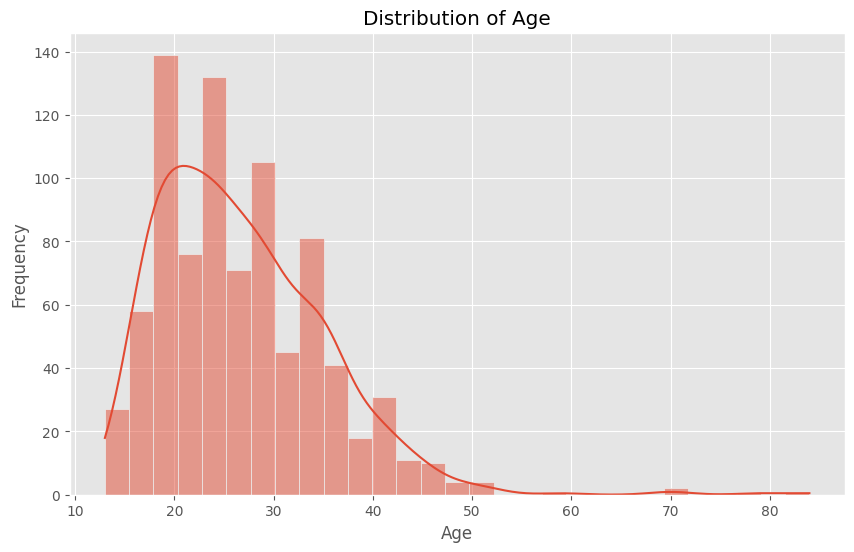

In [23]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

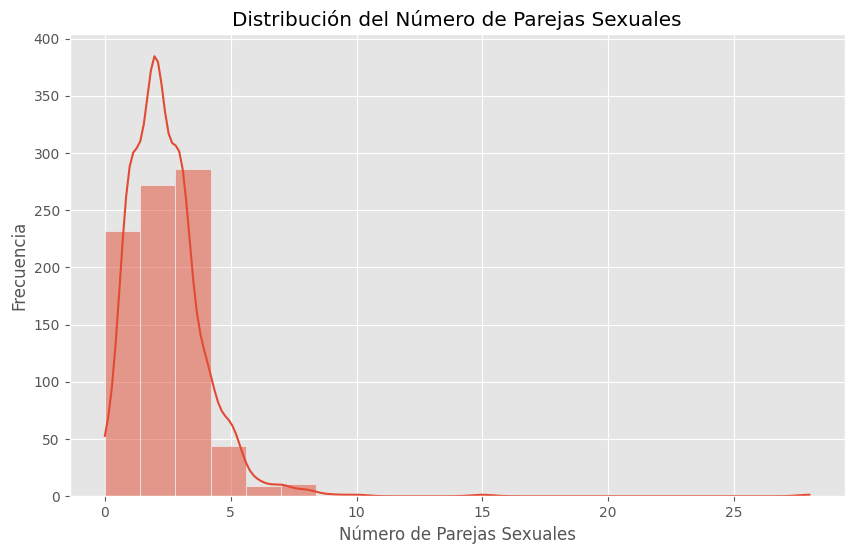

In [24]:
# Histogram for Sexual Partners
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of sexual partners'].dropna(), kde=True, bins=20)
plt.title('Distribución del Número de Parejas Sexuales')
plt.xlabel('Número de Parejas Sexuales')
plt.ylabel('Frecuencia')
plt.show()

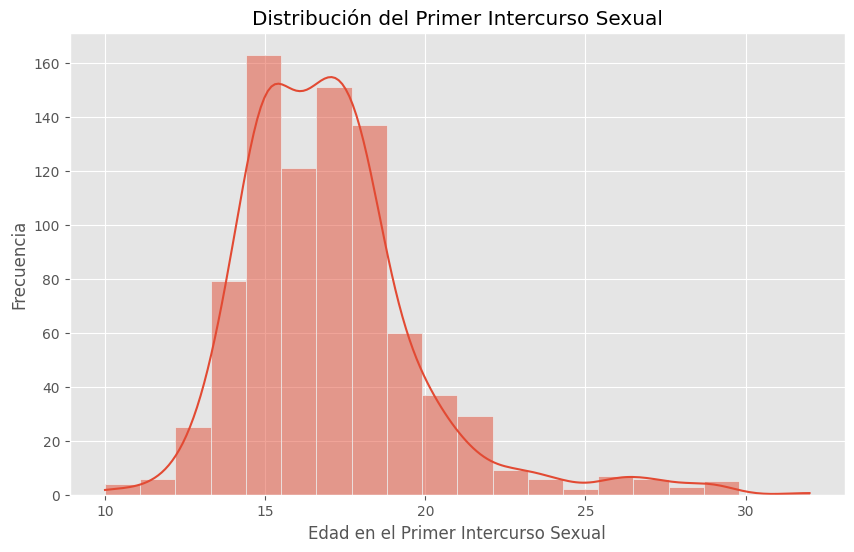

In [25]:
# Histogram for First Sexual Intercourse
plt.figure(figsize=(10, 6))
sns.histplot(df['First sexual intercourse'].dropna(), kde=True, bins=20)
plt.title('Distribución del Primer Intercurso Sexual')
plt.xlabel('Edad en el Primer Intercurso Sexual')
plt.ylabel('Frecuencia')
plt.show()

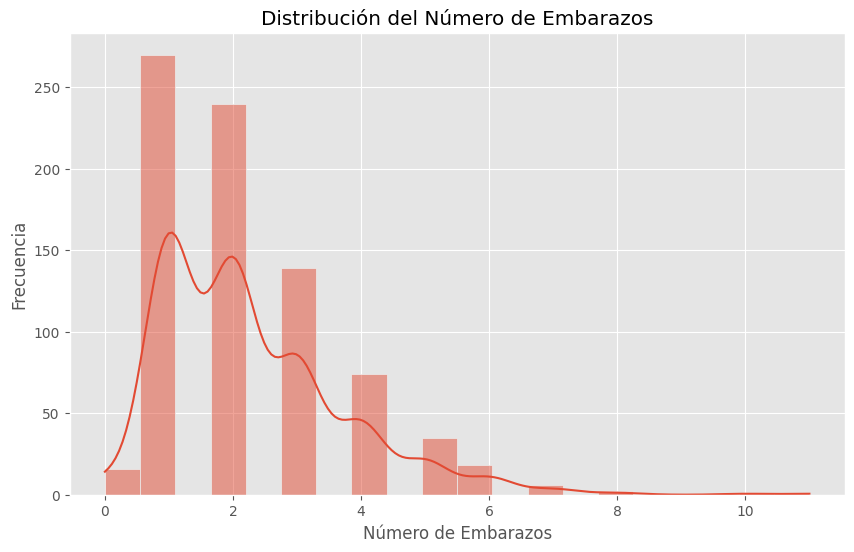

In [26]:
# Histogram for Number of Pregnancies
plt.figure(figsize=(10, 6))
sns.histplot(df['Num of pregnancies'].dropna(), kde=True, bins=20)
plt.title('Distribución del Número de Embarazos')
plt.xlabel('Número de Embarazos')
plt.ylabel('Frecuencia')
plt.show()

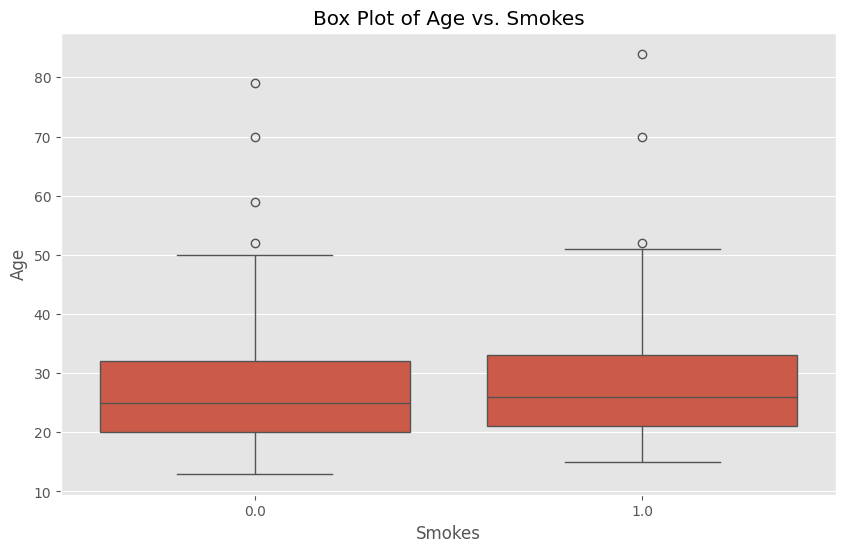

In [27]:
# Box plot: Age vs. Smokes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Smokes', y='Age', data=df)
plt.title('Box Plot of Age vs. Smokes')
plt.xlabel('Smokes')
plt.ylabel('Age')
plt.show()

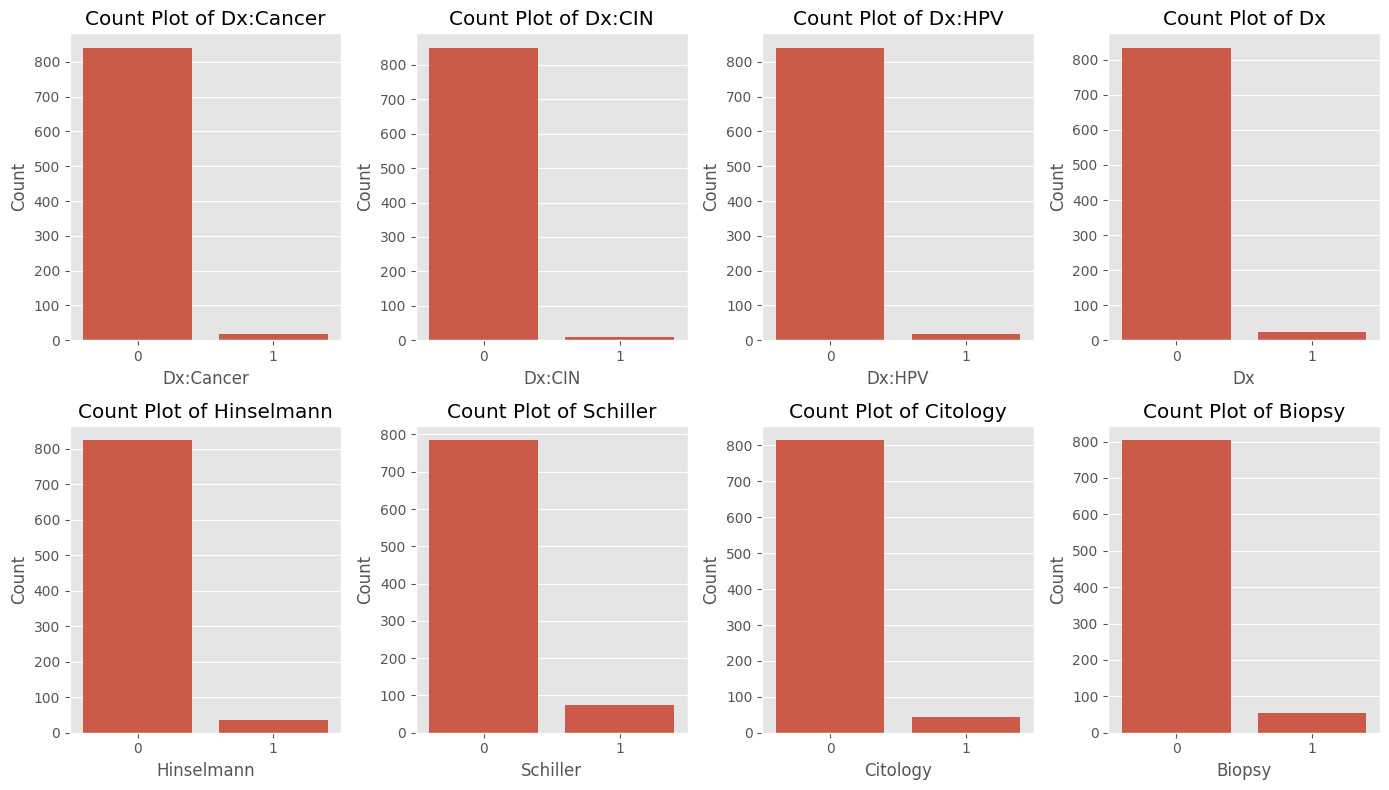

In [28]:
# Count plots for categorical variables
plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Correlation Analysis

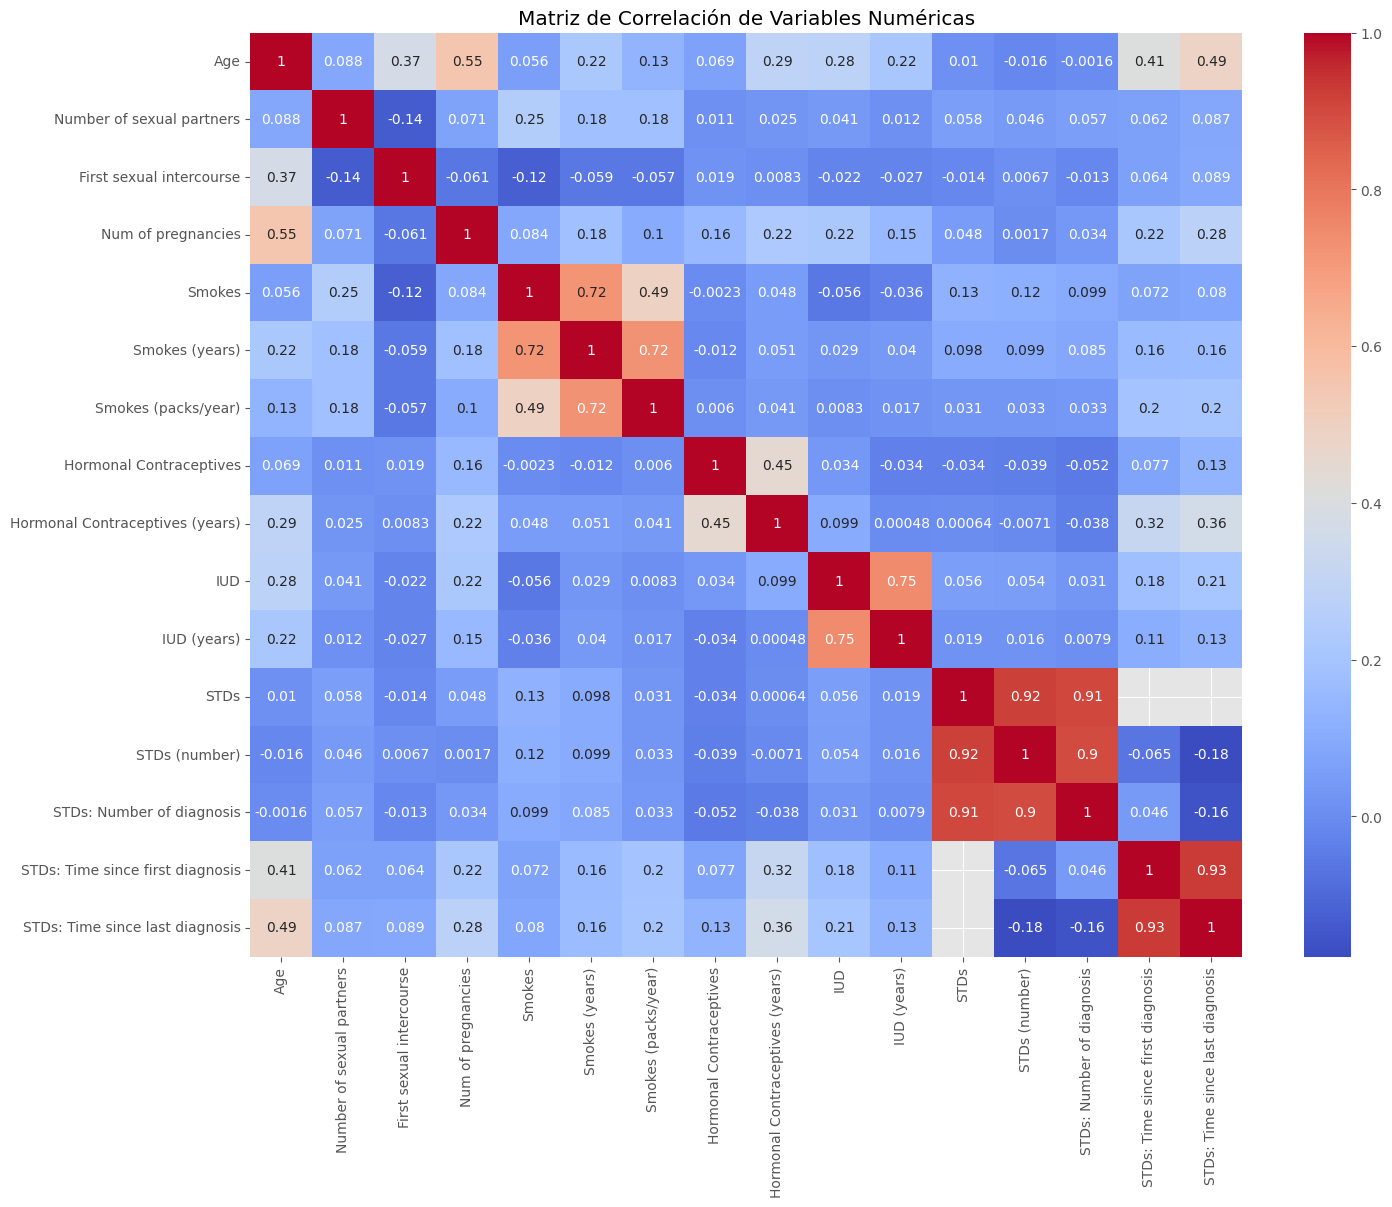

In [29]:
correlation_matrix = df[numerical_cols].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

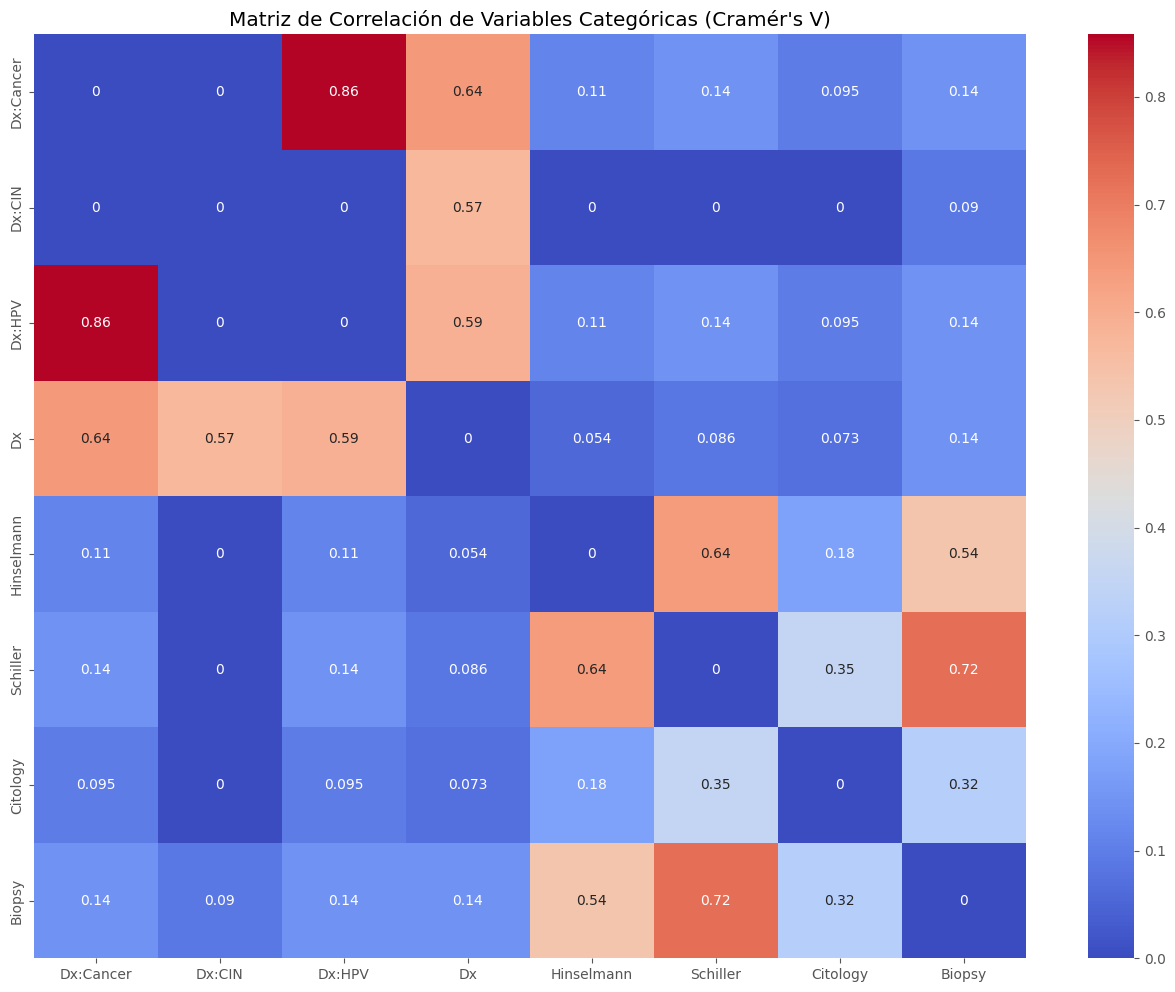

In [30]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))), 
                                index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

plt.figure(figsize=(16, 12))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación de Variables Categóricas (Cramér's V)")
plt.show()

### Frequency tables - Categorical variables

In [31]:
frequency_tables = {}
proportion_tables = {}

for col in categorical_cols:
    frequency_table = df[col].value_counts()
    proportion_table = df[col].value_counts(normalize=True)
    
    frequency_tables[col] = frequency_table
    proportion_tables[col] = proportion_table

for col in categorical_cols:
    print(f"Frequency Table for {col}")
    display(frequency_tables[col].to_frame())
    print(f"Proportion Table for {col}")
    display(proportion_tables[col].to_frame())

Frequency Table for Dx:Cancer


,Dx:Cancer
0,840
1,18


Proportion Table for Dx:Cancer


,Dx:Cancer
0,0.979021
1,0.020979


Frequency Table for Dx:CIN


,Dx:CIN
0,849
1,9


Proportion Table for Dx:CIN


,Dx:CIN
0,0.98951
1,0.01049


Frequency Table for Dx:HPV


,Dx:HPV
0,840
1,18


Proportion Table for Dx:HPV


,Dx:HPV
0,0.979021
1,0.020979


Frequency Table for Dx


,Dx
0,834
1,24


Proportion Table for Dx


,Dx
0,0.972028
1,0.027972


Frequency Table for Hinselmann


,Hinselmann
0,823
1,35


Proportion Table for Hinselmann


,Hinselmann
0,0.959207
1,0.040793


Frequency Table for Schiller


,Schiller
0,784
1,74


Proportion Table for Schiller


,Schiller
0,0.913753
1,0.086247


Frequency Table for Citology


,Citology
0,814
1,44


Proportion Table for Citology


,Citology
0,0.948718
1,0.051282


Frequency Table for Biopsy


,Biopsy
0,803
1,55


Proportion Table for Biopsy


,Biopsy
0,0.935897
1,0.064103


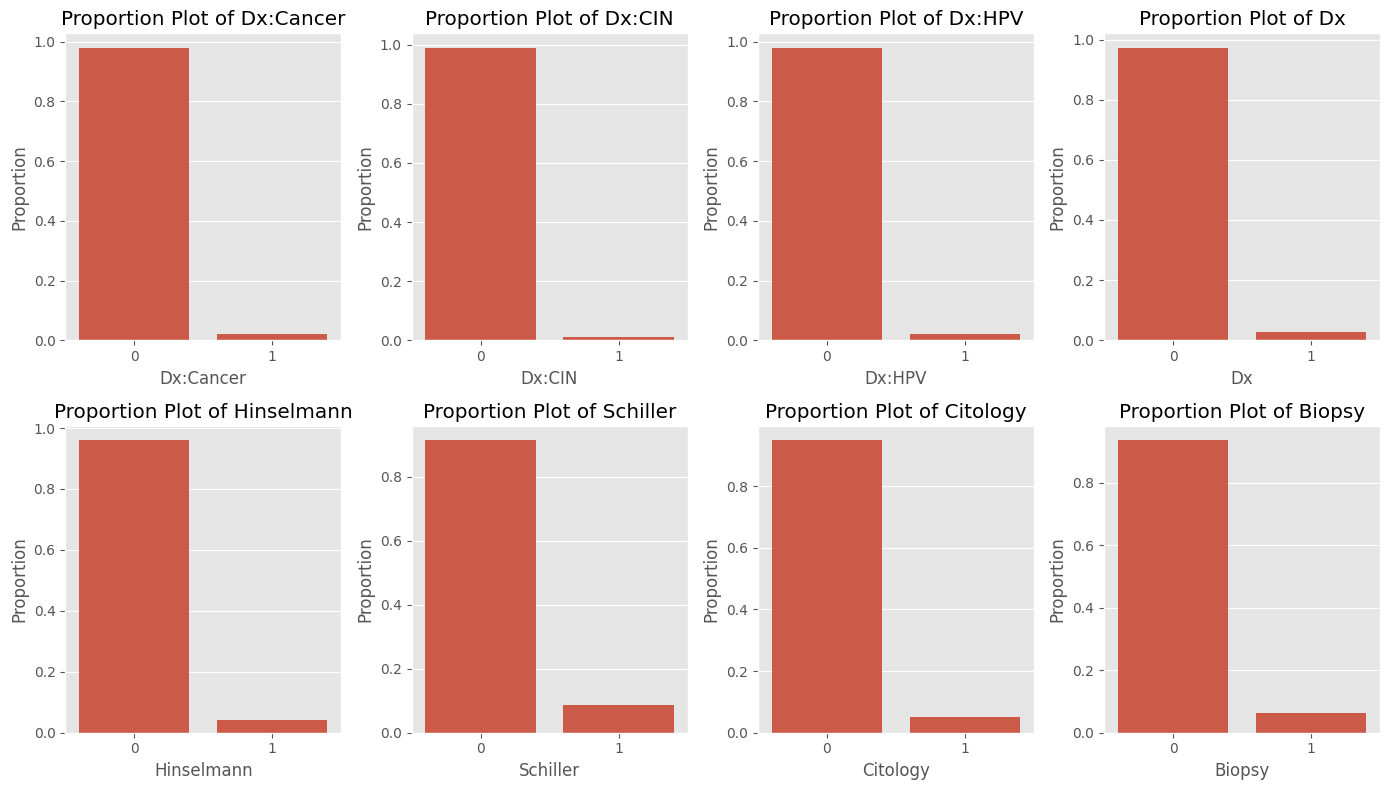

In [32]:
# Gráficas de barras NORMALIZADAS para proporciones
plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 4, i)
    prop_data = df[col].value_counts(normalize=True)
    sns.barplot(x=prop_data.index, y=prop_data.values)
    plt.title(f'Proportion Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

# Missing values

In [33]:
# count NaN in each column
nanPerColumn = df.isna().sum()

# count the total NaN in the dataset
toalNan = nanPerColumn.sum()

print("NaN per column:\n", nanPerColumn)
print("\nTotal NaN in the dataset:", toalNan)

NaN per column:
 Age                                     0
Number of sexual partners               0
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B 